# Preprocessing

In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('punkt_tab')

# Download resource yang dibutuhkan NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Inisialisasi stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download resource yang benar
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('ulasan_byond_10.000.csv')

In [ ]:
data['rating'].value_counts()

,count
rating,
5,4534
1,3826
2,734
3,589
4,317


In [ ]:
data = pd.read_csv('ulasan_byond_labeled_10.000.csv')

In [ ]:
data['final_label'].value_counts()

,count
final_label,
positif,5450
negatif,4154
netral,396


In [ ]:
def preprocess(dat):
    #casefolding
    dat = dat.str.lower()

    #Punctuation Removal - seluruh simbol diganti penjadi space
    regex = r'\-t'
    dat = dat.str.replace(regex, ' ', regex=True) #hapus
    regex = r'[, ]+'
    dat = dat.str.replace(regex, ' ', regex=True) #hapus
    regex = r'[^a-zA-Z\s]'
    dat = dat.str.replace(regex, ' ', regex=True) # hapus

    # Hapus enter, ganti dengan space
    regex = r'\n'
    dat = dat.str.replace(regex, ' ', regex=True) # hapus

    return dat

In [ ]:
#memeriksa isi stopword list
#indo = stopwords.words('indonesian')
#indo

In [ ]:
def stop(dat):
    stop_words = list(set(stopwords.words('indonesian')))

    #list stopword yang disingkat
    stop_words.append("fitur"), stop_words.append("aplikasi"),stop_words.append("byond"),stop_words.append("ya"),stop_words.append("banget"),stop_words.append("bikin"),stop_words.append("mohon"),
    stop_words.append("dgn"), stop_words.append("adlh"),stop_words.append("ak"),stop_words.append("aq"),stop_words.append("min"),stop_words.append("pake"),stop_words.append("via"),
    stop_words.append("sy"), stop_words.append("gw"), stop_words.append("gue"),stop_words.append("pa"),stop_words.append("aja"),stop_words.append("dia"),stop_words.append("kalo"),
    stop_words.append("ap"), stop_words.append("apkah"),stop_words.append("apkh"),stop_words.append("bt"),stop_words.append("apl"),stop_words.append("apk"),stop_words.append("sort"),


    for i, v in dat.iterrows():
        words = word_tokenize(v['text'])

        # dat[i] = [w for w in words if not w in stop_word]

        text=''
        for w in words:
            if w not in stop_words:
                text=text+' '+w
        dat.at[i, 'text']=text
        #del words
    return dat

In [ ]:
data['review'] = preprocess(data['review'])

In [ ]:
data = stop(data)

KeyError: 'text'

In [ ]:
data['review']

,review
0,saya udh ratusan kali daftar byond ini selalu ...
1,transaksi gagal tpii saldo saya terpotong dari...
2,kenapa mental teruss mau login
3,bagus
4,bagus
...,...
9995,sering masalah saat hendak transaksi aplikasin...
9996,tampilan baru lebih keren syariah juga bisa mo...
9997,sudah nyoba lebih x sepertinya buat daptar buk...
9998,tampilannya keren simple aplikasi ini cocok un...


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# for i, v in data.iterrows():
#   data['review'] = stemmer.stem(v['review'])

# data.apply(lambda row: stemmer.stem(row['review']), axis=1)

data['review'] = [stemmer.stem(row) for row in data['review']]

In [ ]:
data = data[data.review != ""]


In [ ]:
data.to_csv("hasil_prepros.csv")

# Fitur Ekstraksi dengan TF-IDF

In [ ]:
import numpy as np
import sys
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('hasil_prepros.csv')

In [ ]:
data['final_label'].value_counts()

,count
final_label,
positif,5436
negatif,4150
netral,395


In [ ]:
X = data['review']
y = data['rating']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

print("Rata-rata Akurasi:", np.mean(scores))

Rata-rata Akurasi: nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [   1    2    4 ... 9978 9979 9980] TEST: [   0    3    8   14   23   29   31   33   35   36   39   47   50   76
   80   88   92   96  101  103  106  107  108  119  131  135  144  169
  245  248  251  252  259  263  265  267  274  286  290  291  303  304
  311  315  316  318  321  330  333  335  346  349  360  367  376  381
  388  410  416  439  447  450  457  461  474  483  487  500  510  513
  518  532  543  563  567  568  576  577  582  586  590  592  621  623
  624  637  647  655  668  673  683  713  733  735  742  761  764  765
  782  789  794  795  799  850  856  872  921  932  952  958  965  970
  971 1026 1056 1068 1071 1076 1078 1084 1087 1090 1107 1111 1112 1123
 1145 1147 1149 1155 1156 1175 1180 1183 1190 1199 1208 1217 1224 1247
 1253 1254 1261 1277 1310 1315 1339 1355 1360 1369 1372 1373 1393 1402
 1408 1413 1432 1441 1446 1453 1458 1470 1472 1482 1498 1509 1512 1513
 1516 1543 1562 1568 1576 1595 1597 1608 1616 1617 1626 1631 1650 1658
 1660 1671 1672 1684 1691 16

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y )

In [ ]:

#y_train.value_counts()

In [ ]:
#y_test.value_counts()

# Naive Bayes Classifier

In [ ]:
from sklearn import naive_bayes
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Siapkan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
# Loop setiap fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Vektorisasi
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Model
    model = MultinomialNB()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Rata-rata akurasi
print("Akurasi per fold:", accuracies)
print("Rata-rata akurasi:", np.mean(accuracies))

Akurasi per fold: [0.7787787787787788, 0.7875751503006012, 0.7625250501002004, 0.8026052104208417, 0.7905811623246493, 0.7675350701402806, 0.7875751503006012, 0.7935871743486974, 0.7785571142284569, 0.7935871743486974]
Rata-rata akurasi: 0.7842907035291805


[[355   2   2   0  12]
 [ 61   1   0   0   2]
 [ 56   1   1   0   8]
 [ 15   0   0   0  16]
 [ 29   2   0   0 435]]
              precision    recall  f1-score   support

           1       0.69      0.96      0.80       371
           2       0.17      0.02      0.03        64
           3       0.33      0.02      0.03        66
           4       0.00      0.00      0.00        31
           5       0.92      0.93      0.93       466

    accuracy                           0.79       998
   macro avg       0.42      0.38      0.36       998
weighted avg       0.72      0.79      0.73       998



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


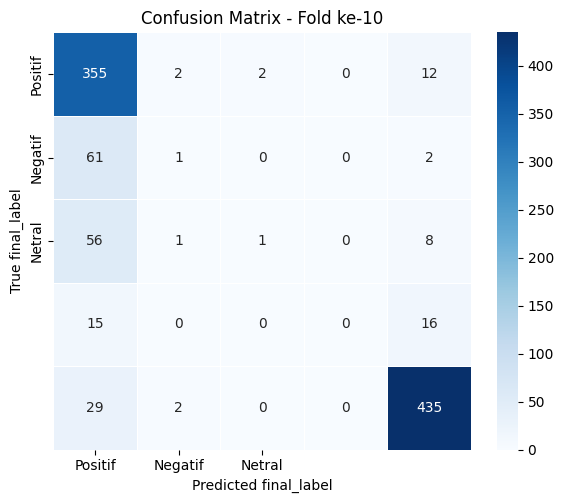

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

predictions = y_pred
# Memastikan y_test dan predictions memiliki panjang yang sama
if len(y_test) != len(predictions):
    min_length = min(len(y_test), len(predictions))
    y_test = y_test[:min_length]  # memotng agar panjangnya sama
    predictions = predictions[:min_length]

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Cetak confusion matrix dan classification report
print(cm)
print(classification_report(y_test, predictions))

# menampilkan Confusion Matrix
# Label kelas
labels = ['Positif', 'Negatif', 'Netral']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=True, square=True, linewidths=0.5, linecolor='white')

plt.xlabel('Predicted final_label')
plt.ylabel('True final_label')
plt.title('Confusion Matrix - Fold ke-10')
plt.tight_layout()
plt.show()

SET UP DAN K-FOLD(AMBIL FOLD KE-10)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

final_X_test = None
final_y_pred = None

for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Vektorisasi
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Fit dan prediksi
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Simpan hasil khusus untuk fold ke-10
    if fold == 10:
        final_X_test = X_test
        final_y_pred = y_pred
        final_X_test_vec = X_test_vec


VISUALISASI DISTRIBUSI PREDIKSI FOLD KE-1O

positif: 516
negatif: 6
netral: 3


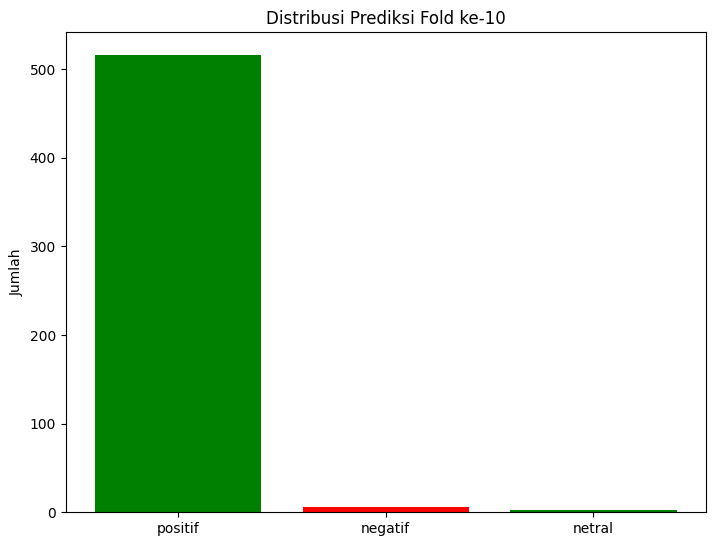

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah prediksi
positifcount = sum(pred == 1 for pred in final_y_pred)
negatifcount = sum(pred == 2 for pred in final_y_pred)
netralcount = sum(pred == 3 for pred in final_y_pred)

# Visualisasi
x = ['positif', 'negatif', 'netral']
y = [positifcount, negatifcount, netralcount]

print("positif:", positifcount)
print("negatif:", negatifcount)
print("netral:", netralcount)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, y, color=['green', 'red'])
plt.title("Distribusi Prediksi Fold ke-10")
plt.ylabel("Jumlah")
plt.show()

SINGKRONISASI DENGAN KAMUS PRESEPSI

In [ ]:
import pandas as pd
import re

# Load kamus persepsi
kamus_df = pd.read_csv('kamus_persepsi_sentimen.csv')
kamus_df.columns = kamus_df.columns.str.lower()

kamus_positif = set(kamus_df[kamus_df['positive'].notna()]['positive'])
kamus_negatif = set(kamus_df[kamus_df['negative'].notna()]['negative'])
kamus_netral = set(kamus_df[kamus_df['netral'].notna()]['netral'])

# Siapkan DataFrame dari fold ke-10
X_review_series = pd.Series(final_X_test)
df_prediksi = pd.DataFrame({
    'review': X_review_series,
    'prediksi': final_y_pred
})

# Ekstrak kata yang cocok dengan kamus
def ekstrak_review(review, kamus):
    review = re.sub(r'[^a-zA-Z\s]', '', review).lower()
    return [review for review in review.split() if review in kamus]

kata_positif = []
kata_negatif = []
kata_netral = []

for teks in df_prediksi[df_prediksi['prediksi'] == 1]['review']:
    kata_positif.extend(ekstrak_kata(teks, kamus_positif))

for teks in df_prediksi[df_prediksi['prediksi'] == 2]['review']:
    kata_negatif.extend(ekstrak_kata(teks, kamus_negatif))

for teks in df_prediksi[df_prediksi['prediksi'] == 3]['review']:
    kata_netral.extend(ekstrak_kata(teks, kamus_netral))

print("🔹 Kata-kata dalam ulasan POSITIF:")
print(kata_positif)
print("\n🔸 Kata-kata dalam ulasan NEGATIF:")
print(kata_negatif)
print("\n🔸 Kata-kata dalam ulasan NETRAL:")
print(kata_netral)

🔹 Kata-kata dalam ulasan POSITIF:
['mudah', 'baik', 'aman', 'bagus', 'baik', 'aman', 'baik', 'baik', 'baik', 'baik', 'baik', 'bagus', 'aman', 'bagus', 'baik', 'stabil', 'nyaman', 'baik', 'cepat', 'baik', 'bagus', 'baik', 'cepat', 'nyaman', 'baik', 'cepat', 'baik', 'nyaman', 'baik', 'bagus', 'baik', 'baik', 'bagus', 'baik', 'baik', 'bagus', 'baik', 'baik', 'baik', 'baik', 'baik', 'cepat', 'baik', 'cepat', 'bagus', 'bagus', 'baik', 'baik', 'baik', 'baik', 'bagus', 'baik', 'baik', 'bagus', 'baik', 'baik', 'sukses', 'nyaman', 'baik', 'baik', 'baik', 'lancar', 'bagus', 'baik', 'baik', 'aman', 'aman', 'mudah', 'nyaman', 'baik', 'baik', 'praktis', 'cepat', 'baik', 'mudah', 'baik', 'baik', 'nyaman', 'baik', 'aman', 'bagus', 'baik', 'mudah', 'baik', 'bagus', 'baik', 'baik', 'nyaman', 'nyaman', 'baik', 'baik', 'baik', 'baik', 'bagus', 'baik', 'mudah', 'baik', 'bagus', 'bagus', 'baik', 'baik', 'baik', 'bagus', 'mudah', 'bagus', 'baik', 'baik', 'baik', 'mudah', 'cepat', 'sempurna', 'mudah', 'sempu

WORDCLOUD

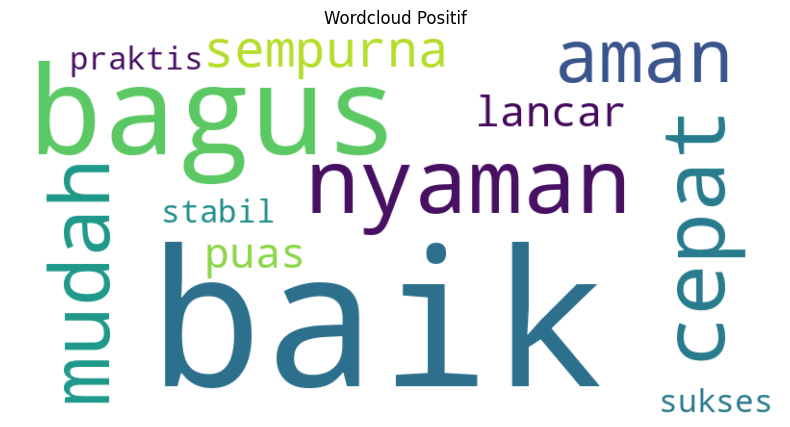

In [ ]:
from wordcloud import WordCloud

# Wordcloud POSITIF
positif_review = ' '.join(kata_positif)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positif_review)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Positif")
plt.show()


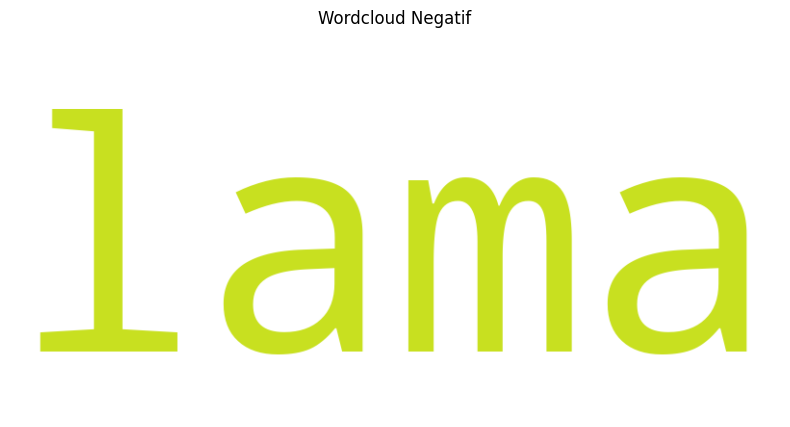

In [ ]:
# Wordcloud NEGATIF
negatif_review = ' '.join(kata_negatif)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negatif_review)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Negatif")
plt.show()

In [ ]:
# Wordcloud NETRAL
negatif_review = ' '.join(kata_netral)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(netral_review)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Netral")
plt.show()

NameError: name 'netral_review' is not defined

SIMPAN KATA SINGKRONISASI